In [18]:
import pandas as pd
import numpy as np
import re
from keras.layers import Dense,GaussianNoise,LeakyReLU,Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
 


## Проведем предобработку данных


In [19]:
train=open('train.txt','r')
train = train.read().splitlines()
test=open('test.txt','r')
test=test.read().splitlines()

Так как самая первая строка - индексы, то удаляем ее

Как видно, первые строки - числа

In [20]:
train.pop(0)
test.pop(0)
print(train[0])
print(test[0])

1 -0.335467047065564 0.102235638179093 red
1 -2.24246004235479 0.47048871459103 green


Создаем из считанных файлов массивы

In [21]:
train_data=np.array(train)
test_data=np.array(test)

Создаем пустую обучающую выборку, red - 0, green - 1

In [22]:
width=2
train_length=train_data.shape[0]
test_length=test_data.shape[0]

x_train=np.ones((train_length,width))
y_train=np.ones((train_length,1))
x_test=np.ones((test_length,width))
y_test=np.ones((test_length,1))

Создаем на основе считанных файлов выборку

In [23]:

for i,line in enumerate(train_data):
        data=re.split(r' ',line)
        x_train[i][0]=float(data[1])
        x_train[i][1]=float(data[2])
        if data[3]=='red':
            y_train[i]=0
        else:
            y_train[i]=1
            

for i,line in enumerate(test_data):
        data=re.split(r' ',line)
        x_test[i][0]=float(data[1])
        x_test[i][1]=float(data[2])
        if data[3]=='red':
            y_test[i]=0
        else:
            y_test[i]=1

### Нормализуем данные


Нормализуем обуающую выборку


In [24]:
means,stds=x_train.mean(axis=0),x_train.std(axis=0)

for i in range(x_train.shape[0]):
    for j in range(x_train.shape[1]):
        x_train[i][j]=(x_train[i][j]-means[j])/stds[j]

print('Первая строка после нормализации',x_train[0])
print('Среднее арифметическое по стобцам ',means)
print('Дисперсия по столбцам' ,stds)

Первая строка после нормализации [-0.2401377   0.11391791]
Среднее арифметическое по стобцам  [-0.08505942 -0.00590062]
Дисперсия по столбцам [1.04276681 0.94924718]


Нормализуем тестовую выборку

In [25]:
for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        x_test[i][j]=(x_test[i][j]-means[j])/stds[j]

## Создадим модель нейронной сети

In [26]:
model=Sequential()

#добавим нормального шума ,чтобы избежать переобучения
model.add(GaussianNoise(stddev=0.02,input_shape=(2,)))

model.add(Dense(256))
model.add(LeakyReLU(0.2))

model.add(Dense(128))
model.add(LeakyReLU(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_2 (GaussianNo (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               768       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                

In [28]:
batch=2
epochs=80

validation_split=0.2      

model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
        
history=model.fit(x_train,y_train,batch_size=batch,epochs=epochs,verbose=True,validation_split=validation_split)

Train on 80 samples, validate on 20 samples
Epoch 1/80
80/80 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.5750 - val_loss: 0.5617 - val_accuracy: 0.5500
Epoch 2/80
80/80 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.6125 - val_loss: 0.5079 - val_accuracy: 0.7000
Epoch 3/80
80/80 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7500 - val_loss: 0.4420 - val_accuracy: 0.8500
Epoch 4/80
80/80 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8500 - val_loss: 0.3424 - val_accuracy: 0.9000
Epoch 5/80
80/80 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.9375 - val_loss: 0.2985 - val_accuracy: 0.9000
Epoch 6/80
80/80 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9125 - val_loss: 0.2439 - val_accuracy: 0.9000
Epoch 7/80
80/80 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9625 - val_loss: 0.2122

Выведем график метрики качества и метрики ошибки от эпохи

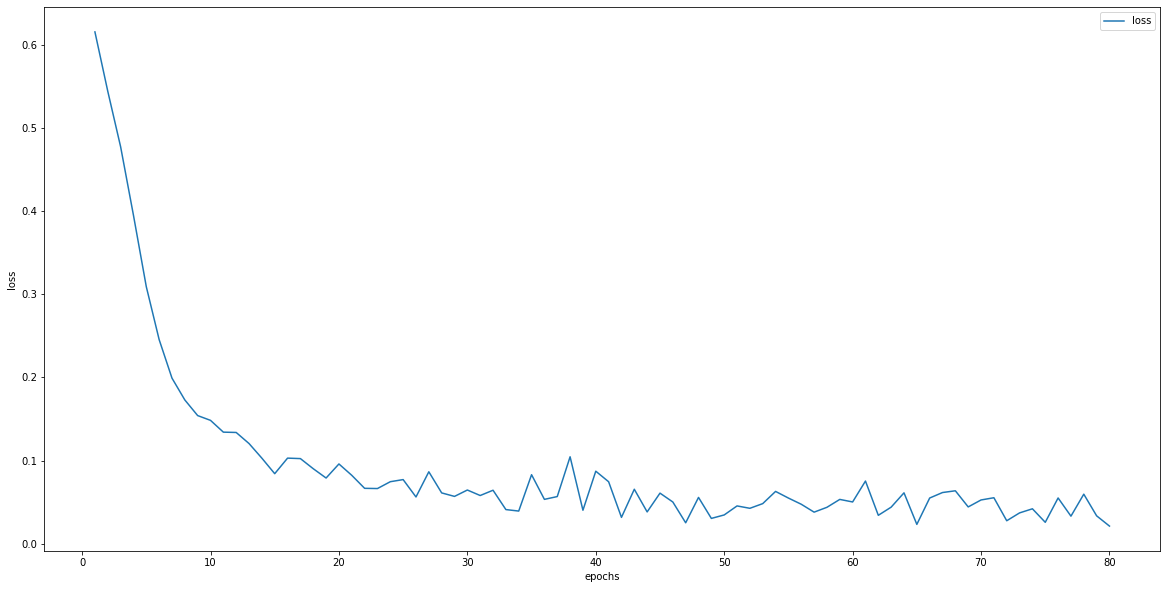

In [29]:
x=np.arange(1,epochs+1)

fig, ax = plt.subplots()
ax.plot(x,history.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend()

fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

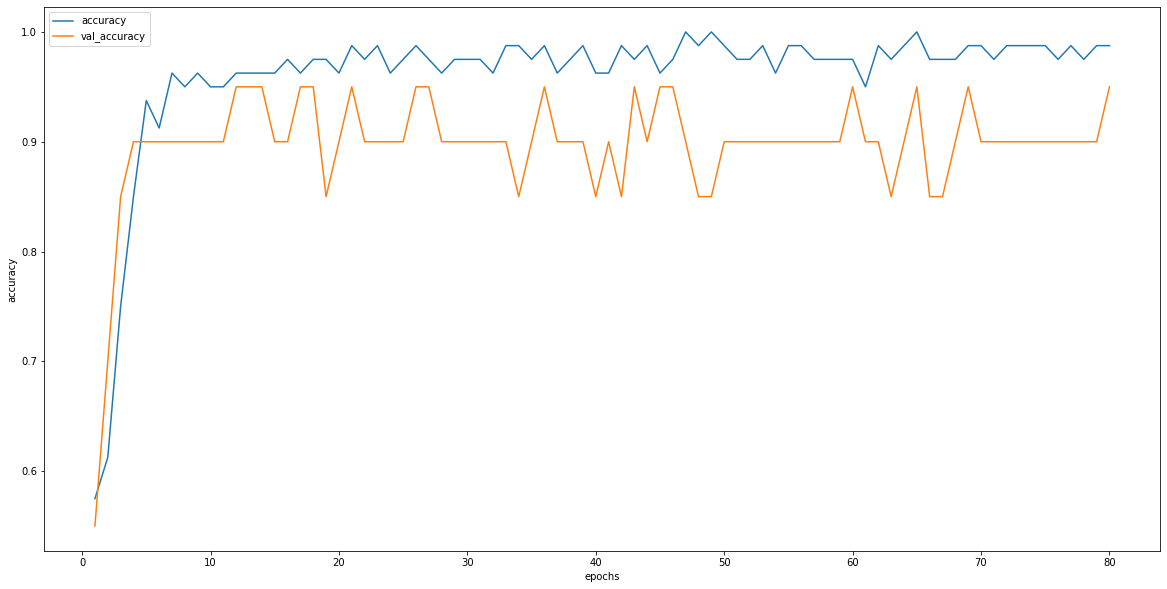

In [30]:
x=np.arange(1,epochs+1)

fig, ax = plt.subplots()

ax.plot(x,history.history['accuracy'],label='accuracy')
ax.plot(x,history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

Проверим модель на тестовой выборке

In [31]:
score=model.evaluate(x_test,y_test)
print("Test loss:", score[0])
print('Test accuracy:', score[1])


100/100 [==============================] - 0s 60us/step
Test loss: 0.05118327916075941
Test accuracy: 0.9800000190734863


## Создадим модели байеосовского классификатора бернулли и гаусса

In [32]:
NB = GaussianNB()  
NB.fit(x_train, y_train)   
BNB=BernoulliNB()
BNB.fit(x_train, y_train)  

C:\Anaconda\envs\env_neuro\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\envs\env_neuro\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

Проверим модель на тестовой выборке

In [33]:
y_predict = NB.predict(x_test)  
y2_predict=BNB.predict(x_test)
print("Accuracy Normal NB: {:.2f}".format(NB.score(x_test, y_test)))
print("Accuracy Bernulli NB: {:.2f}".format(BNB.score(x_test, y_test)))

Accuracy Normal NB: 0.93
Accuracy Bernulli NB: 0.60


## Создадим рандомное дерево решений

In [34]:
rf = RandomForestClassifier()
 
rf.fit(x_train, y_train)
score=rf.score(x_test,y_test)
print('Random forest accuracy',score) 


Random forest accuracy 0.95


C:\Users\Администратор\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
